https://tomaugspurger.github.io/modern-6-visualization.html

UNIVERSIDAD NACIONAL DE COLOMBIA.  
FACULTAD DE INGENIERÍA.

PROGRAMA DE FORMACIÓN  
MACHINE LEARNING AND DATA SCIENCE MLDS.
MÓDULO II.  
Bogotá Colombia Mayo de 2021



---



**PROYECTO FINAL**  
Nombre: Jefferson Rivera Patiño  
Cel: 3118322699

# 0. Importación de librerías de Python.



In [ ]:
# Ejecute esta celda para instalar la versión más reciente
!pip install -U plotly
!pip install -U kaleido # Necesitamos esta librería para exportar las visualizaciones como imágenes estáticas

     |████████████████████████████████| 13.2MB 230kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 79.9MB 37kB/s 


In [ ]:
# Importar librerías
from datetime import datetime, date 
import pandas as pd
import numpy as np
from scipy import stats
import datetime
import re
import scipy
import nltk
from enum import Enum
from nltk.corpus import stopwords


# Librerías de visualiación
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [ ]:
# Librerías de Sklearn
import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.svm import SVC        
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score




# Problema

# Objetivos

Clasificar las textos introducidos en un sistema de comentario como por ejemplo review de productos en una tienda virtual, en emociones, ejemplo ira, felicidad, amor, etc.

Con esto se puede hacer un sistema automatizado de clasificación de texto y poder identifcar que productos productos despiertan algunas emociones y con base en esta infromación tomar decisiones para mejorar algunos productos.

# 1. ¿Qué pregunta(s) quiere responder a partir de sus datos?


# 1.1. Describa a continuacíon los datos de forma precisa.

# Funciones de utilidad

In [ ]:
# Con el código númerico retorna el string con la emoción
def EmotionCodeToText(code):
    selector = {
        2.0: 'happy',
        4.0: 'sadness',
        0.0: 'anger',
        1.0: 'fear',
        3.0: 'love',
        5.0: 'surprise',
    }

    return selector.get(code)

In [ ]:
# Con el string con la emoción retorna el emoji
class EmotionTextToEmoji(str, Enum):
    happy = '\U0001F600'
    sadness = '\U0001F625'
    anger = '\U0001F620'
    fear  = '\U0001F628'
    love  = '\U0001F970'
    surprise = '\U0001F632'
   
    def __str__(self):
      return self.value

In [ ]:
# función para predecir el texto a emoción
def predict_emotion_text(model = None, text='love'):
  """
  model: Modelo
  text: texto de prueba
  """
  code_predict = model.predict(vectorizer.transform([text]))
  code_predict = code_predict[0]
  emotion_text = EmotionCodeToText(code_predict)

  print(f'Emotion: { emotion_text} | {str(EmotionTextToEmoji[emotion_text])} ')

In [ ]:
def get_metrics_model(y_test=None, y_pred=None):
  """
  y_test : conjunto de datos de prueba
  y_pred : consjunto de datos predichos 
  """
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  print('fscore: ', metrics.f1_score(y_test, y_pred, average="macro"))
  print('precision: ',metrics.precision_score(y_test, y_pred, average="macro"))
  print('recall: ',metrics.recall_score(y_test, y_pred, average="macro"))  

In [ ]:
# Limpia el texto
def cleantext(data):
    data = re.sub(r'@[A-Za-z0-9]+', '', data) # remove @mentions
    data = re.sub(r'#', '', data)# remove # tag
    data = re.sub(r'RT[\s]+', '', data) # remove the RT
    data = re.sub(r'https?:\/\/\S+', '', data) # remove links
    data = re.sub('(\\\\u([a-z]|[0-9])+)', ' ', data) # remove unicode characters
    data = re.sub(r'"', '', data)
    data = re.sub(r':', '', data)
    return data

In [ ]:
def plot_confusion_matrix(y_test=None, y_pred=None):
  """
  y_test
  y_pred
  """
  labels = df['Emotion'].unique()
  cm1 = pd.DataFrame(confusion_matrix(y_test, y_pred), index = labels, columns = labels)

  plt.figure(figsize = (10, 8))
  sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
  plt.ylabel('Valores actuales')
  plt.xlabel('Valores predichos')
  plt.show()  

# 2. Carga del dataset

In [ ]:
df = pd.read_csv('http://45.90.109.111/api/emotion.csv')
df.head(10)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,happy
9,i feel romantic too,love


In [ ]:
df.shape

(21433, 2)

# Descripción del dataset

Origen del dataset.
Explicación de las variables.

# 2.1. Limpieza de los datos

In [ ]:
df.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [ ]:
df['Text'] = df['Text'].apply(cleantext)

# 2. Descripción de los datos.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21433 entries, 0 to 21432
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21433 non-null  object
 1   Emotion  21433 non-null  object
dtypes: object(2)
memory usage: 335.0+ KB


In [ ]:
df.dtypes

Text       object
Emotion    object
dtype: object

In [ ]:
df['Emotion'].value_counts()

happy       7025
sadness     6259
anger       2986
fear        2650
love        1636
surprise     877
Name: Emotion, dtype: int64

In [ ]:
df.describe()

,Text,Emotion
count,21433,21433
unique,21380,6
top,i am feeling stressed and more than a bit anxious,happy
freq,2,7025


Registros duplicados

In [ ]:
df.duplicated().sum()

3

In [ ]:
# Eliminación de registros duplicados
df = df.drop_duplicates()
df.shape

(21430, 2)

In [ ]:
df['Emotion'].mode()


0    happy
dtype: object

# 3. Representación gráfica de datos.



In [ ]:
pd.options.plotting.backend = "plotly"

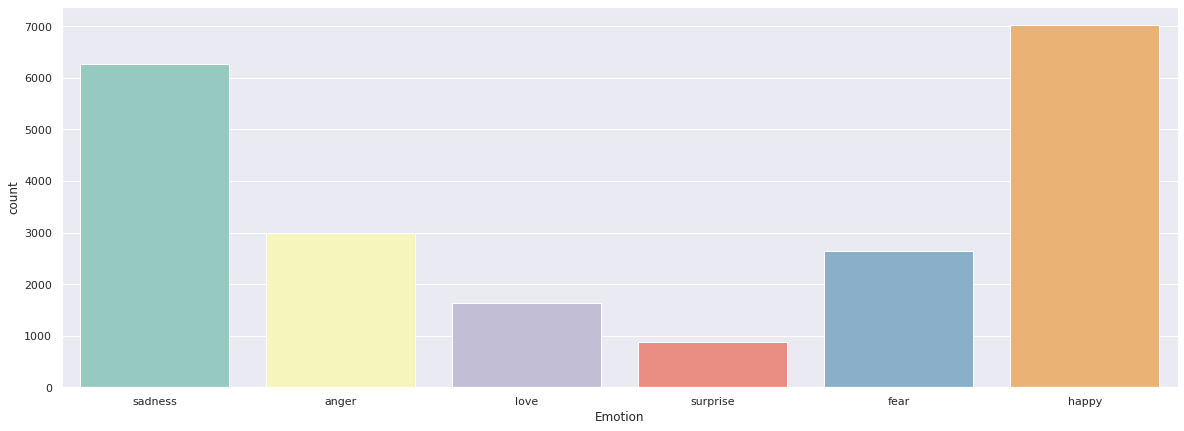

In [ ]:
plt.figure(figsize = (20,7))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Emotion", data=df, palette="Set3", dodge=False)

In [ ]:
fig = df['Emotion'].plot(kind='hist', title="Distribución de emociones", labels='Emotion')
fig.show()

In [ ]:
df['Emotion'].value_counts()

happy       7024
sadness     6259
anger       2985
fear        2649
love        1636
surprise     877
Name: Emotion, dtype: int64

## 3.1 ¿Qué puede extraer de los datos con esta gráfica?
De una breve explicación

# 4. Transformación de variables categorícas


https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d



https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

<center>
<img src="https://www.geeksforgeeks.org/wp-content/uploads/Stop-word-removal-using-NLTK.png">
</center>

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(df['Text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [ ]:
df.Emotion.value_counts()

happy       7024
sadness     6259
anger       2985
fear        2649
love        1636
surprise     877
Name: Emotion, dtype: int64

In [ ]:
enc = OrdinalEncoder()
df["Emotion_code"] = enc.fit_transform(df[["Emotion"]])


In [ ]:
df.Emotion.value_counts()

happy       7024
sadness     6259
anger       2985
fear        2649
love        1636
surprise     877
Name: Emotion, dtype: int64

In [ ]:
df.Emotion_code.value_counts()

2.0    7024
4.0    6259
0.0    2985
1.0    2649
3.0    1636
5.0     877
Name: Emotion_code, dtype: int64

In [ ]:
df.head()

,Text,Emotion,Emotion_code
0,i didnt feel humiliated,sadness,4.0
1,i can go from feeling so hopeless to so damned...,sadness,4.0
2,im grabbing a minute to post i feel greedy wrong,anger,0.0
3,i am ever feeling nostalgic about the fireplac...,love,3.0
4,i am feeling grouchy,anger,0.0


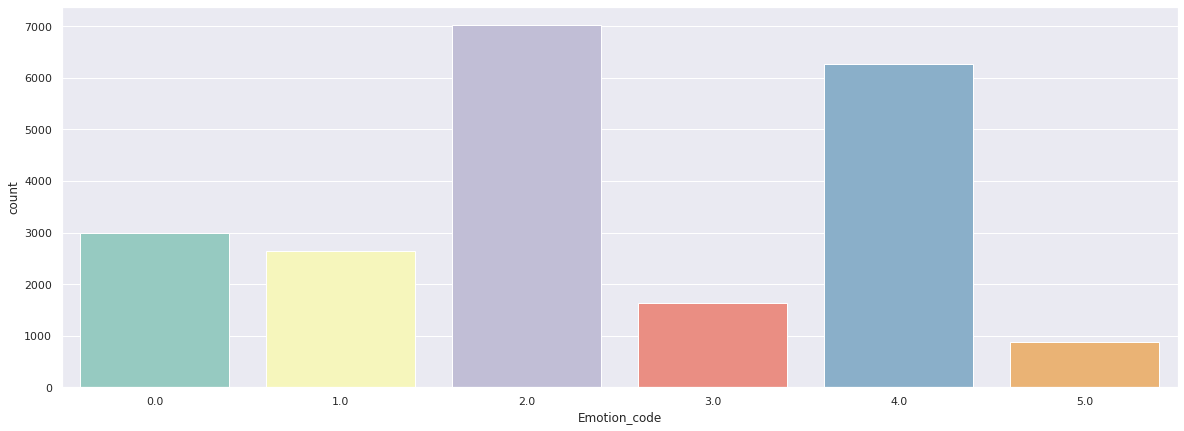

In [ ]:
plt.figure(figsize = (20,7))
ax = sns.countplot(x="Emotion_code", data=df, palette="Set3", dodge=False)

In [ ]:
df.head()

,Text,Emotion,Emotion_code
0,i didnt feel humiliated,sadness,4.0
1,i can go from feeling so hopeless to so damned...,sadness,4.0
2,im grabbing a minute to post i feel greedy wrong,anger,0.0
3,i am ever feeling nostalgic about the fireplac...,love,3.0
4,i am feeling grouchy,anger,0.0


# 4.2. Realice el escalamiento o normalización que requieran los datos

# 6. Particione los datos en entrenamiento y prueba



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Emotion_code'], test_size=0.2, random_state=42)

# 7. Realice un método no supervisado (ejemplo clustering)
Use la inercia del cluster y el coeficiente de silueta y compárelos para saber el número óptimo de clusters de sus datos.

Este paso se debe realizar incluso si sus datos estan supervisados para descubrir patrones dentro de sus datos.

# 8. Regresión logistica

In [ ]:
lr=LogisticRegression(max_iter=1000, multi_class='multinomial')
lem=lr.fit(X_train, y_train)

In [ ]:
y_pred_l  = lem.predict(X_test)
get_metrics_model(y_test=y_test, y_pred = y_pred_l)


Accuracy: 0.8609426038264115
fscore:  0.8148652777624564
precision:  0.8624016094963599
recall:  0.7826382859836777


In [ ]:
predict_emotion_text(model=lem, text="my pc is broken but i am really very happy as i got a new pc from my wife ")

Emotion: happy | 😀 


In [ ]:
print(metrics.classification_report(y_test, y_pred_l))

              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84       598
         1.0       0.84      0.80      0.82       511
         2.0       0.84      0.94      0.89      1355
         3.0       0.89      0.67      0.77       345
         4.0       0.87      0.92      0.90      1306
         5.0       0.82      0.58      0.68       171

    accuracy                           0.86      4286
   macro avg       0.86      0.78      0.81      4286
weighted avg       0.86      0.86      0.86      4286



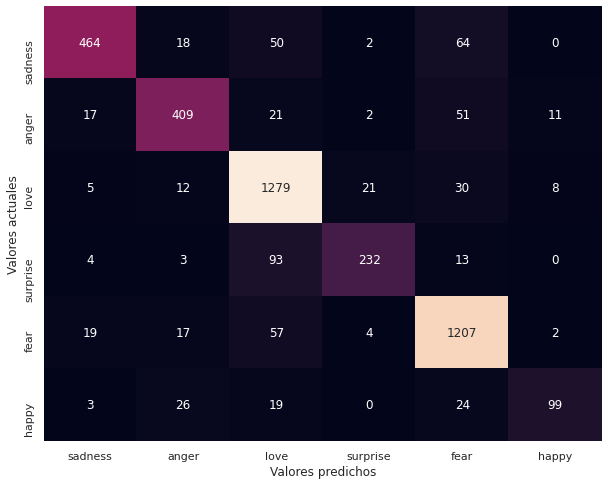

In [ ]:
plot_confusion_matrix(y_test=y_test, y_pred=y_pred_l)

# 8. Árbol de decisión
Entrene un árbol sin modificar los parámetros por defecto

Para cada uno de los casos muestre accuracy, precision, recall y f1-score


In [ ]:
classifier_tree = DecisionTreeClassifier()
classifier_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_tree  = classifier_tree.predict(X_test)
get_metrics_model(y_test = y_test, y_pred = y_pred_tree)

Accuracy: 0.8133457769482034
fscore:  0.7791910676440561
precision:  0.7782849451545847
recall:  0.7810342003894105


In [ ]:
print(metrics.classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78       598
         1.0       0.78      0.80      0.79       511
         2.0       0.85      0.82      0.83      1355
         3.0       0.75      0.72      0.73       345
         4.0       0.86      0.85      0.85      1306
         5.0       0.69      0.67      0.68       171

    accuracy                           0.81      4286
   macro avg       0.78      0.78      0.78      4286
weighted avg       0.81      0.81      0.81      4286



In [ ]:
classifier_tree.feature_importances_

array([1.36675485e-04, 1.68842857e-04, 1.23992964e-04, ...,
       2.46651105e-05, 0.00000000e+00, 4.96952873e-04])

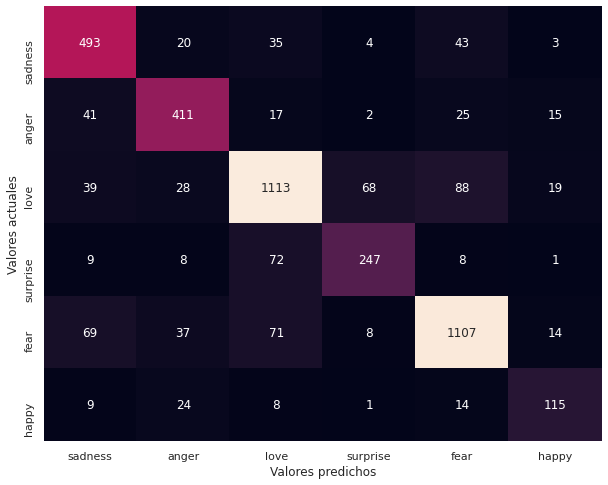

In [ ]:
plot_confusion_matrix(y_test=y_test, y_pred=y_pred_tree)

In [ ]:
predict_emotion_text(model=classifier_tree, text="my pc is broken but i am really very happy as i got a new pc from my wife ")

Emotion: happy | 😀 


# 8.1 Modifique el árbol de decisión anterior y utilice una grilla cuadrada para obtener el mejor árbol

In [ ]:
rfc=DecisionTreeClassifier(random_state=1)

param_grid = {'criterion':['gini','entropy'], 'max_depth' : [3,5,7,20]}
grid_search = GridSearchCV(classifier_tree,param_grid=param_grid,cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_estimator_

In [ ]:
best_model = grid_search.best_estimator_
test_acc = best_model.score(X_test, y_test)
test_acc

In [ ]:
pred2 = grid_search.predict(X_test)
print(classification_report(y_test, pred2))

# 9. Entrene una máquina de soporte vectorial


Para cada uno de los casos muestre accuracy, precision, recall y f1-score


In [ ]:
rbf_svm = SVC()
#rbf_svm.fit(X_train, y_train)

In [ ]:
#rbf_svm_predict = rbf_svm.predict([y_test])

# 9.1 Utilice una grilla cuadrada para obtener la mejor máquina de soporte vectorial, utilice varios kernels


# 9.2 Utilice una grilla aleatoria para obtener la mejor máquina de soporte vectorial, utilice varios kernels


# 10.Entrene un algoritmo de redes de neuronales


Para cada uno de los casos muestre accuracy, precision, recall y f1-score


In [ ]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(100,100,100), max_iter=300, alpha=0.0001).fit(X_train, y_train)

In [ ]:
clf.predict_proba(X_test[:1])

In [ ]:
 clf.score(X_test, y_test)

In [ ]:
pred_clf = clf.predict(X_test)
print(classification_report(y_test, pred_clf))

In [ ]:
plot_confusion_matrix(y_test=y_test, y_pred=pred_clf)

In [ ]:
get_metrics_model(y_test = y_test, y_pred = pred_clf)

In [ ]:
predict_emotion_text(model=clf, text="my pc is broken")

# 10.1 Utilice una grilla cuadrada para obtener los mejores parámetros para la red neuronal

In [ ]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf2 = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

In [ ]:
pred_clf = clf.predict(X_test)
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81       598
         1.0       0.78      0.80      0.79       511
         2.0       0.86      0.90      0.88      1355
         3.0       0.84      0.67      0.75       345
         4.0       0.87      0.89      0.88      1306
         5.0       0.72      0.67      0.69       171

    accuracy                           0.84      4286
   macro avg       0.81      0.79      0.80      4286
weighted avg       0.84      0.84      0.84      4286



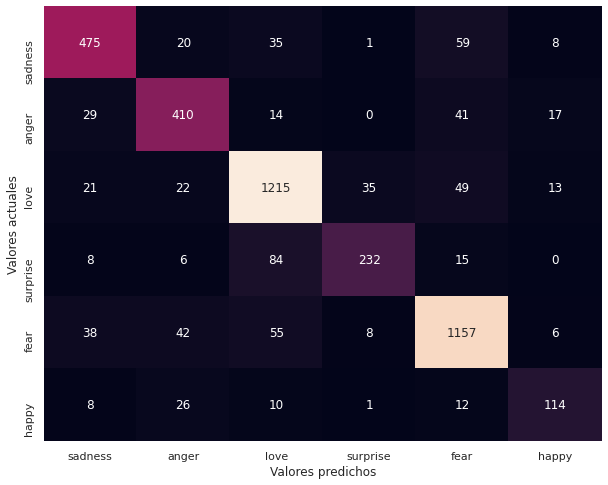

In [ ]:
plot_confusion_matrix(y_test=y_test, y_pred=pred_clf)

# 10.2 Utilice una grilla aleatoria para obtener los mejores parámetros para la red neuronal

# 11. Random Forest


Para cada uno de los casos muestre accuracy, precision, recall y f1-score


In [ ]:
classifier_1 = RandomForestClassifier()
classifier_1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_r = classifier_1.predict(X_test)
get_metrics_model(y_test = y_test, y_pred = y_pred_r)

Accuracy: 0.8448436770881941
fscore:  0.8102057744961518
precision:  0.8147013934284971
recall:  0.8067827399090689


In [ ]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train) 

In [ ]:
y_pred_r = classifier.predict(X_test)
get_metrics_model(y_test = y_test, y_pred = y_pred_r)

Test

In [ ]:
pred2 = grid_search.predict(X_test)
print(classification_report(y_test, y_pred_r))

In [ ]:
labels = ['sadness', 'anger', 'love', 'surprise', 'fear', 'happy']
cm1 = pd.DataFrame(confusion_matrix(y_test, y_pred_r), index = labels, columns = labels)

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
predict_emotion_text(model=classifier, text="my pc is broken but i am really very happy as i got a new pc from my wife ")


In [ ]:
predict_emotion_text(model=classifier, text="I'm curious to meet you")

In [ ]:
predict_emotion_text(model=classifier, text="I hate you")

In [ ]:
predict_emotion_text(model=classifier, text="I feel sad")

# 11.1 Utilice una grilla aleatoria para obtener los mejores parámetros para el random forest

In [ ]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

NameError: ignored

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 100}

In [ ]:
CV_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
CV_rfc.best_score_

0.3460102638862091

#CREA UNA TABLA COMPARATIVA CON LOS RESULTADOS Y PRUEBAS

# 11.2 Utilice una grilla cuadrada para obtener los mejores parámetros para el random forest

## ¿Cuál fue el mejor algoritmo que funcionó para sus datos?

## ¿Por qué cree que fue el que mejor funcionó?

## ¿Qué otras técnicas cree que puede utilizar para mejorar su algoritmo?

## ¿Los métodos aplicados le ayudaron a responder sus preguntas con base en los datos? Trate de mostrar gráficamente la información extraida del proceso.


## ¿Le hicieron falta datos o realice una conjetura sobre como podría obtener mejores resultados?